In [ ]:
!pip install lifelines

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [ ]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("survival_unemployment.csv")

In [ ]:
survival_unemp.head()

In [ ]:
survival_unemp.info()

In [ ]:
# Spell is referring to time 
T = survival_unemp.spell
T

In [ ]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [ ]:
# Fitting KaplanMeierFitter model on Time and Events for death 
kmf.fit(T,event_observed=survival_unemp.event)# T - time, event_obsserved: whether event occurred or not
# Time-line estimations plot 
kmf.plot()
# This is K-M estimation curve. Shaded region is 95% confidence interval.

In [ ]:
# Over Multiple groups 
# For each group, here group is ui - unemployment insurance
survival_unemp.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

<Axes: xlabel='timeline'>

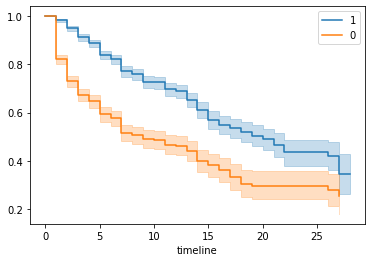

In [ ]:
# comparison of 2 groups
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot(ax=ax)
